In [241]:
import numpy as np
import pandas as pd

# Loading the Data

In [242]:
loan_data_inputs_train = pd.read_csv('D:/Credit Risk Modelling/loanData_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('D:/Credit Risk Modelling/loanData_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv('D:/Credit Risk Modelling/loanData_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('D:/Credit Risk Modelling/loanData_targets_test.csv', index_col = 0, header = None)

In [243]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [244]:
loan_data_targets_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0


In [245]:
loan_data_inputs_train.shape

(373028, 323)

In [246]:
loan_data_targets_train.shape

(373028, 1)

In [247]:
loan_data_inputs_test.shape

(93257, 323)

In [248]:
loan_data_targets_test.shape

(93257, 1)

# Selecting the Features

In [249]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['Grade: A',
'Grade: B',
'Grade: C',
'Grade: D',
'Grade: E',
'Grade: F',
'Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Home_Ownership: OWN',
'Home_Ownership: MORTGAGE',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Addr_State: NM_VA',
'Addr_State: NY',
'Addr_State: OK_TN_MO_LA_MD_NC',
'Addr_State: CA',
'Addr_State: UT_KY_AZ_NJ',
'Addr_State: AR_MI_PA_OH_MN',
'Addr_State: RI_MA_DE_SD_IN',
'Addr_State: GA_WA_OR',
'Addr_State: WI_MT',
'Addr_State: TX',
'Addr_State: IL_CT',
'Addr_State: KS_SC_CO_VT_AK_MS',
'Addr_State: WV_NH_WY_DC_ME_ID',
'Verification_Status: Not Verified',
'Verification_Status: Source Verified',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Purpose: credit_card',
'Purpose: debt_consolidation',
'Purpose: oth__med__vacation',
'Purpose: major_purch__car__home_impr',
'Initial_list_Status: f',
'Initial_list_Status: w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<124',
'mths_since_issue_d:124-125',
'mths_since_issue_d:126-127',
'mths_since_issue_d:128-134',
'mths_since_issue_d:135-138',
'mths_since_issue_d:139-151',
'mths_since_issue_d:152-171',
'mths_since_issue_d:>172',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [250]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Initial_list_Status: f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>172',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [251]:
# n-1 dummy variables
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,Grade: A,Grade: B,Grade: C,Grade: D,Grade: E,Grade: F,Home_Ownership: OWN,Home_Ownership: MORTGAGE,Addr_State: NM_VA,Addr_State: NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [253]:
reg = LogisticRegression()

In [254]:
pd.options.display.max_rows = None

In [255]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\Aritro Das\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [256]:
reg.intercept_

array([-0.31932946])

In [257]:
reg.coef_

array([[ 0.92230131,  0.70848983,  0.52518411,  0.34576765,  0.1872955 ,
         0.01687796,  0.09475165,  0.11202094,  0.05233117,  0.07488144,
         0.07487539,  0.08258502,  0.0962021 ,  0.14745808,  0.11489494,
         0.20217483,  0.2407626 ,  0.24257515,  0.27860602,  0.34929522,
         0.51360469,  0.08201062, -0.01295115,  0.28196592,  0.17945347,
         0.1896572 ,  0.25119378,  0.05155463,  0.07975076,  0.09985648,
         0.12898203,  0.09366639,  0.06582018,  0.1299495 ,  1.11684107,
         0.91834642,  0.8221091 ,  0.62599876,  0.46737517,  0.21066224,
        -0.01139418,  0.96602785,  0.61838269,  0.35345719,  0.14497165,
        -0.02348316, -0.01326258,  0.0068024 , -0.00500016,  0.07142126,
        -0.0738987 , -0.09579537,  0.28676342,  0.14181134, -0.07253501,
         0.05668843, -0.01812967, -0.04640874, -0.0610058 , -0.07156116,
        -0.03246168, -0.08664935,  0.1358104 ,  0.08238697, -0.01964021,
         0.04826236,  0.15683317,  0.05590463,  0.0

In [258]:
feature_name = inputs_train.columns.values

In [259]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Additing an extra row for the interecept
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.319329
1,Grade: A,0.922301
2,Grade: B,0.708490
3,Grade: C,0.525184
4,Grade: D,0.345768
5,Grade: E,0.187296
6,Grade: F,0.016878
7,Home_Ownership: OWN,0.094752
8,Home_Ownership: MORTGAGE,0.112021
9,Addr_State: NM_VA,0.052331


# Build a Logistic Regression Model with P-Values

In [260]:
import numpy as np
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        # Initialize the LogisticRegression model with passed arguments
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        # Fit the logistic regression model
        self.model.fit(X, y)
        
        # Step 1: Compute the Fisher Information Matrix
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        
        # Ensure inputs are float64 for compatibility with np.linalg.inv
        X_float = X.astype(np.float64)
        F_ij = np.dot((X_float / denom).T, X_float)  # Fisher Information Matrix
        
        # Step 2: Invert the Fisher Information Matrix (Cramer-Rao bound)
        try:
            Cramer_Rao = np.linalg.inv(F_ij)  # Inverse Information Matrix
        except np.linalg.LinAlgError as e:
            print(f"Error inverting matrix: {e}")
            return
        
        # Step 3: Estimate the standard errors
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        
        # Step 4: Compute z-scores and p-values
        z_scores = self.model.coef_[0] / sigma_estimates  # z-scores for each model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]  # Two-tailed p-values
        
        # Store results as attributes
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [261]:
reg = LogisticRegression_with_p_values()

In [262]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\Aritro Das\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [263]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Additing an extra row for the interecept
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.319329
1,Grade: A,0.922301
2,Grade: B,0.708490
3,Grade: C,0.525184
4,Grade: D,0.345768
5,Grade: E,0.187296
6,Grade: F,0.016878
7,Home_Ownership: OWN,0.094752
8,Home_Ownership: MORTGAGE,0.112021
9,Addr_State: NM_VA,0.052331


In [264]:
p_values = reg.p_values

In [265]:
# Since intercept doesnt have p-value, adding NaN for interceot column
p_values = np.append(np.nan, np.array(p_values))

In [266]:
summary_table['p-values'] = p_values

In [267]:
summary_table

,Feature name,Coefficients,p-values
0,Intercept,-0.319329,NaN
1,Grade: A,0.922301,9.701041e-24
2,Grade: B,0.708490,4.095312e-30
3,Grade: C,0.525184,9.505768e-20
4,Grade: D,0.345768,3.121618e-10
5,Grade: E,0.187296,1.457867e-04
6,Grade: F,0.016878,7.423270e-01
7,Home_Ownership: OWN,0.094752,2.723464e-06
8,Home_Ownership: MORTGAGE,0.112021,1.118321e-18
9,Addr_State: NM_VA,0.052331,1.023087e-01


In [268]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['Grade: A',
'Grade: B',
'Grade: C',
'Grade: D',
'Grade: E',
'Grade: F',
'Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Home_Ownership: OWN',
'Home_Ownership: MORTGAGE',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Addr_State: NM_VA',
'Addr_State: NY',
'Addr_State: OK_TN_MO_LA_MD_NC',
'Addr_State: CA',
'Addr_State: UT_KY_AZ_NJ',
'Addr_State: AR_MI_PA_OH_MN',
'Addr_State: RI_MA_DE_SD_IN',
'Addr_State: GA_WA_OR',
'Addr_State: WI_MT',
'Addr_State: TX',
'Addr_State: IL_CT',
'Addr_State: KS_SC_CO_VT_AK_MS',
'Addr_State: WV_NH_WY_DC_ME_ID',
'Verification_Status: Not Verified',
'Verification_Status: Source Verified',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Purpose: credit_card',
'Purpose: debt_consolidation',
'Purpose: oth__med__vacation',
'Purpose: major_purch__car__home_impr',
'Initial_list_Status: f',
'Initial_list_Status: w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<124',
'mths_since_issue_d:124-125',
'mths_since_issue_d:126-127',
'mths_since_issue_d:128-134',
'mths_since_issue_d:135-138',
'mths_since_issue_d:139-151',
'mths_since_issue_d:152-171',
'mths_since_issue_d:>172',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [269]:
ref_categories = ['Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Initial_list_Status: f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>172',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [270]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,Grade: A,Grade: B,Grade: C,Grade: D,Grade: E,Grade: F,Home_Ownership: OWN,Home_Ownership: MORTGAGE,Addr_State: NM_VA,Addr_State: NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [271]:
reg2 = LogisticRegression_with_p_values()

In [272]:
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\Aritro Das\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [273]:
feature_name = inputs_train.columns.values

In [274]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1 # Additing an extra row for the interecept
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.392185
1,Grade: A,0.945410
2,Grade: B,0.730358
3,Grade: C,0.547751
4,Grade: D,0.363242
5,Grade: E,0.205303
6,Grade: F,0.024094
7,Home_Ownership: OWN,0.095269
8,Home_Ownership: MORTGAGE,0.108093
9,Addr_State: NM_VA,0.047166


In [275]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.392185,NaN
1,Grade: A,0.945410,7.098993e-25
2,Grade: B,0.730358,3.540545e-32
3,Grade: C,0.547751,1.384177e-21
4,Grade: D,0.363242,2.635919e-11
5,Grade: E,0.205303,2.361574e-05
6,Grade: F,0.024094,6.329406e-01
7,Home_Ownership: OWN,0.095269,2.270876e-06
8,Home_Ownership: MORTGAGE,0.108093,1.231167e-17
9,Addr_State: NM_VA,0.047166,1.405820e-01


# PD Model Validation (Test)

## Out-of-sample validation (Test)

In [276]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['Grade: A',
'Grade: B',
'Grade: C',
'Grade: D',
'Grade: E',
'Grade: F',
'Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Home_Ownership: OWN',
'Home_Ownership: MORTGAGE',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Addr_State: NM_VA',
'Addr_State: NY',
'Addr_State: OK_TN_MO_LA_MD_NC',
'Addr_State: CA',
'Addr_State: UT_KY_AZ_NJ',
'Addr_State: AR_MI_PA_OH_MN',
'Addr_State: RI_MA_DE_SD_IN',
'Addr_State: GA_WA_OR',
'Addr_State: WI_MT',
'Addr_State: TX',
'Addr_State: IL_CT',
'Addr_State: KS_SC_CO_VT_AK_MS',
'Addr_State: WV_NH_WY_DC_ME_ID',
'Verification_Status: Not Verified',
'Verification_Status: Source Verified',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Purpose: credit_card',
'Purpose: debt_consolidation',
'Purpose: oth__med__vacation',
'Purpose: major_purch__car__home_impr',
'Initial_list_Status: f',
'Initial_list_Status: w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<124',
'mths_since_issue_d:124-125',
'mths_since_issue_d:126-127',
'mths_since_issue_d:128-134',
'mths_since_issue_d:135-138',
'mths_since_issue_d:139-151',
'mths_since_issue_d:152-171',
'mths_since_issue_d:>172',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [277]:
ref_categories = ['Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Initial_list_Status: f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>172',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [278]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,Grade: A,Grade: B,Grade: C,Grade: D,Grade: E,Grade: F,Home_Ownership: OWN,Home_Ownership: MORTGAGE,Addr_State: NM_VA,Addr_State: NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [279]:
y_hat_test = reg2.model.predict(inputs_test)

In [280]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [281]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [282]:
y_hat_test_proba

array([[0.0757186 , 0.9242814 ],
       [0.14798946, 0.85201054],
       [0.11251168, 0.88748832],
       ...,
       [0.0253689 , 0.9746311 ],
       [0.03969752, 0.96030248],
       [0.04787513, 0.95212487]])

In [283]:
y_hat_test_proba[: ][:, 1]

array([0.9242814 , 0.85201054, 0.88748832, ..., 0.9746311 , 0.96030248,
       0.95212487])

In [284]:
y_hat_test_proba = y_hat_test_proba[: ][:, 1]

In [285]:
y_hat_test_proba

array([0.9242814 , 0.85201054, 0.88748832, ..., 0.9746311 , 0.96030248,
       0.95212487])

In [286]:
loan_data_targets_test_temp = loan_data_targets_test

In [287]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [288]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [289]:
df_actual_predicted_probs.shape

(93257, 2)

In [290]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [291]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [292]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924281
288564,1,0.852011
213591,1,0.887488
263083,1,0.942133
165001,1,0.968369


# Accuracy and Area under the Curve

In [293]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [294]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7384,2806
1,35881,47186


In [295]:
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079179,0.030089
1,0.384754,0.505978


In [296]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] 
+ (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

np.float64(0.5059781035203792)

In [297]:
from sklearn.metrics import roc_curve, roc_auc_score

In [298]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.08346275e-04, ...,
        9.99975923e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99265302, 0.99054204, ..., 0.50858276, 0.49961727,
        0.49337776]))

In [299]:
# Here we store each of the three arrays in a separate variable. 
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

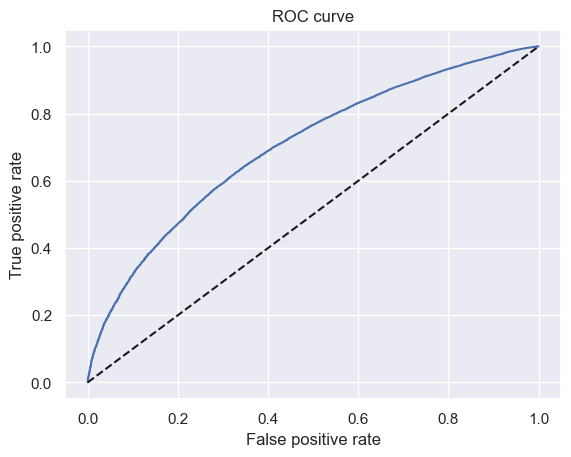

In [301]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We name the x-axis "False positive rate".
plt.xlabel('False positive rate')
# We name the y-axis "True positive rate".
plt.ylabel('True positive rate')
# We name the graph "ROC curve".
plt.title('ROC curve')

In [302]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

np.float64(0.7016570393718266)

# Calculating Credit Scorecard

In [303]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.392185,NaN
1,Grade: A,0.945410,7.098993e-25
2,Grade: B,0.730358,3.540545e-32
3,Grade: C,0.547751,1.384177e-21
4,Grade: D,0.363242,2.635919e-11
5,Grade: E,0.205303,2.361574e-05
6,Grade: F,0.024094,6.329406e-01
7,Home_Ownership: OWN,0.095269,2.270876e-06
8,Home_Ownership: MORTGAGE,0.108093,1.231167e-17
9,Addr_State: NM_VA,0.047166,1.405820e-01


In [304]:
ref_categories

['Grade: G',
 'Home_Ownership: RENT_OTHER_NONE_ANY',
 'Addr_State: ND_NE_IA_NV_FL_HI_AL',
 'Verification_Status: Verified',
 'Purpose: educ__sm_b__wedd__ren_en__mov__house',
 'Initial_list_Status: f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>172',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [305]:
# We have not taken ref categories into reg model.
# Coefficients of ref. cat. are 0.
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,Grade: G,0,NaN
1,Home_Ownership: RENT_OTHER_NONE_ANY,0,NaN
2,Addr_State: ND_NE_IA_NV_FL_HI_AL,0,NaN
3,Verification_Status: Verified,0,NaN
4,Purpose: educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,Initial_list_Status: f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>172,0,NaN
9,int_rate:>20.281,0,NaN


In [306]:
# Combining the ref cat. with the summary table
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard.head()

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.392185,NaN
1,1,Grade: A,0.945410,7.098993e-25
2,2,Grade: B,0.730358,3.540545e-32
3,3,Grade: C,0.547751,1.384177e-21
4,4,Grade: D,0.363242,2.635919e-11


In [307]:
# Splitting the Feature name columns using : and taking the word before :
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [308]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.392185,NaN,Intercept
1,1,Grade: A,0.945410,7.098993e-25,Grade
2,2,Grade: B,0.730358,3.540545e-32,Grade
3,3,Grade: C,0.547751,1.384177e-21,Grade
4,4,Grade: D,0.363242,2.635919e-11,Grade


In [309]:
min_score =  300
max_score = 850

In [310]:
# We find the min. coeff. for each category of ind. var.
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Addr_State                     0.000000
Grade                          0.000000
Home_Ownership                 0.000000
Initial_list_Status            0.000000
Intercept                     -0.392185
Purpose                        0.000000
Verification_Status           -0.016386
acc_now_delinq                 0.000000
annual_inc                    -0.184472
dti                           -0.127326
emp_length                     0.000000
inq_last_6mths                -0.075916
int_rate                       0.000000
mths_since_earliest_cr_line   -0.030352
mths_since_issue_d            -0.035564
mths_since_last_delinq         0.000000
mths_since_last_record        -0.057256
term                           0.000000
Name: Coefficients, dtype: float64

In [311]:
# Adding up the min. coeff. across all categories
min_sum_coeff = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coeff

np.float64(-0.919457286390413)

In [312]:
# We find the max. coeff. for each category of ind. var.
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Addr_State                     0.454127
Grade                          0.945410
Home_Ownership                 0.108093
Initial_list_Status            0.055198
Intercept                     -0.392185
Purpose                        0.273674
Verification_Status            0.077013
acc_now_delinq                 0.143344
annual_inc                     0.454366
dti                            0.202814
emp_length                     0.135911
inq_last_6mths                 0.283508
int_rate                       0.979193
mths_since_earliest_cr_line    0.064031
mths_since_issue_d             1.114152
mths_since_last_delinq         0.158904
mths_since_last_record         0.328262
term                           0.075228
Name: Coefficients, dtype: float64

In [313]:
# Adding up the max. coeff. across all categories
max_sum_coeff = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coeff

np.float64(5.461044379662104)

In [314]:
df_scorecard['Score - Calculation'] =  df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coeff - min_sum_coeff)
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.392185,NaN,Intercept,-33.806432
1,1,Grade: A,0.945410,7.098993e-25,Grade,81.494490
2,2,Grade: B,0.730358,3.540545e-32,Grade,62.956926
3,3,Grade: C,0.547751,1.384177e-21,Grade,47.216192
4,4,Grade: D,0.363242,2.635919e-11,Grade,31.311503


In [315]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coeff) / (max_sum_coeff - min_sum_coeff)) * (max_score - min_score) + min_score

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_11392\3416334126.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coeff) / (max_sum_coeff - min_sum_coef

In [316]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.392185,NaN,Intercept,345.450896
1,1,Grade: A,0.945410,7.098993e-25,Grade,81.494490
2,2,Grade: B,0.730358,3.540545e-32,Grade,62.956926
3,3,Grade: C,0.547751,1.384177e-21,Grade,47.216192
4,4,Grade: D,0.363242,2.635919e-11,Grade,31.311503


In [317]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
#df_scorecard.head()

In [318]:
#min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
#min_sum_score_prel

In [319]:
#max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
#max_sum_score_prel

In [320]:
#df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
#df_scorecard

In [321]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#df_scorecard['Score - Final'][76] = 9
#df_scorecard['Score - Final'][72] = -4

In [322]:
min_sum_score_prel_final = df_scorecard.groupby('Original feature name')['Score - Calculation'].min().sum()
min_sum_score_prel_final

np.float64(300.0)

In [323]:
max_sum_score_prel_final = df_scorecard.groupby('Original feature name')['Score - Calculation'].max().sum()
max_sum_score_prel_final

np.float64(850.0)

# Calculation Credit Score

In [324]:
inputs_test_with_ref_cat.head()

,Grade: A,Grade: B,Grade: C,Grade: D,Grade: E,Grade: F,Grade: G,Home_Ownership: RENT_OTHER_NONE_ANY,Home_Ownership: OWN,Home_Ownership: MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0


In [325]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,-0.392185,NaN,Intercept,345.450896,345.0,345.0
1,1,Grade: A,0.945410,7.098993e-25,Grade,81.494490,81.0,81.0
2,2,Grade: B,0.730358,3.540545e-32,Grade,62.956926,63.0,63.0
3,3,Grade: C,0.547751,1.384177e-21,Grade,47.216192,47.0,47.0
4,4,Grade: D,0.363242,2.635919e-11,Grade,31.311503,31.0,31.0


In [326]:
inputs_test_with_ref_cat_w_intercept = 0
inputs_test_with_ref_cat_w_intercept

0

In [327]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [328]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [329]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,Grade: A,Grade: B,Grade: C,Grade: D,Grade: E,Grade: F,Grade: G,Home_Ownership: RENT_OTHER_NONE_ANY,Home_Ownership: OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0


In [330]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [331]:
scorecard_scores = df_scorecard['Score - Final']

In [332]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [333]:
scorecard_scores.shape

(102,)

In [334]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [335]:
scorecard_scores.shape

(102, 1)

In [336]:
y_scores = round(inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores), 0)

In [337]:
y_scores.head()

,0
362514,595.0
288564,531.0
213591,556.0
263083,619.0
165001,672.0


# From Credit Score to PD

In [338]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coeff - min_sum_coeff) + min_sum_coeff
sum_coef_from_score = np.float64(sum_coef_from_score)
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [339]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score

array([[0.9243387 ],
       [0.85325392],
       [0.88598563],
       ...,
       [0.97412091],
       [0.95900566],
       [0.95159098]])

In [223]:
df_actual_predicted_probs = pd.concat([pd.DataFrame(y_hat_proba_from_score)], axis = 1)
df_actual_predicted_probs.index = y_scores.index
df_actual_predicted_probs.head()

,0
362514,0.924339
288564,0.853254
213591,0.885986
263083,0.941653
165001,0.967582


In [340]:
# Probabilities do not exactly match due to rounding off of scores
y_hat_test_proba[0: 5]

array([0.9242814 , 0.85201054, 0.88748832, 0.9421329 , 0.96836891])

# Setting Cut-offs

Text(0.5, 1.0, 'ROC curve')

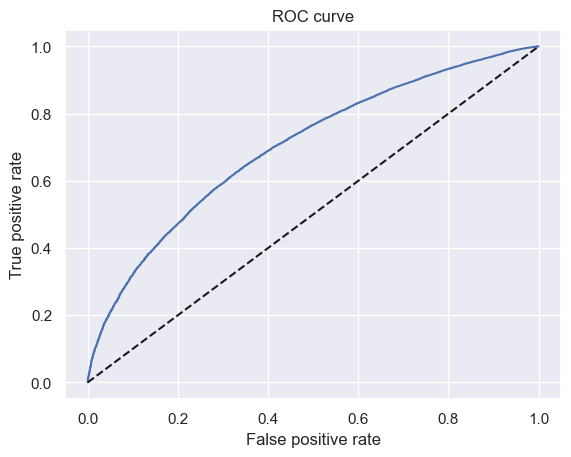

In [341]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We name the x-axis "False positive rate".
plt.xlabel('False positive rate')
# We name the y-axis "True positive rate".
plt.ylabel('True positive rate')
# We name the graph "ROC curve".
plt.title('ROC curve')

In [342]:
thresholds

array([       inf, 0.99265302, 0.99054204, ..., 0.50858276, 0.49961727,
       0.49337776])

In [343]:
thresholds.shape

(17328,)

In [344]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [345]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [346]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.992653,0.000000,0.000012
2,0.990542,0.000000,0.000108
3,0.990532,0.000098,0.000108
4,0.989794,0.000098,0.000385


In [347]:
# Setting the 1st thresholds equal to ~ 1
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_11392\1026169852.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


In [348]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.992653,0.000000,0.000012
2,0.990542,0.000000,0.000108
3,0.990532,0.000098,0.000108
4,0.989794,0.000098,0.000385


In [349]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coeff) * ((max_score - min_score) / (max_sum_coeff - min_sum_coeff)) + min_score).round()

In [350]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3546.0
1,0.992653,0.000000,0.000012,802.0
2,0.990542,0.000000,0.000108,780.0
3,0.990532,0.000098,0.000108,780.0
4,0.989794,0.000098,0.000385,774.0


In [351]:
df_cutoffs['Score'][0] = max_score

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_11392\3137964156.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score


In [352]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992653,0.000000,0.000012,802.0
2,0.990542,0.000000,0.000108,780.0
3,0.990532,0.000098,0.000108,780.0
4,0.989794,0.000098,0.000385,774.0


In [353]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17323,0.518894,0.999804,0.999940,386.0
17324,0.513149,0.999804,0.999976,384.0
17325,0.508583,0.999902,0.999976,382.0
17326,0.499617,0.999902,1.000000,379.0
17327,0.493378,1.000000,1.000000,377.0


In [354]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [355]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [356]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17323,0.518894,0.999804,0.999940,386.0,93250,7,0.999925,0.000075
17324,0.513149,0.999804,0.999976,384.0,93253,4,0.999957,0.000043
17325,0.508583,0.999902,0.999976,382.0,93254,3,0.999968,0.000032
17326,0.499617,0.999902,1.000000,379.0,93256,1,0.999989,0.000011
17327,0.493378,1.000000,1.000000,377.0,93257,0,1.000000,0.000000


In [357]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903887,0.256428,0.545090,572.0,47892,45365,0.513549,0.486451
5001,0.903887,0.256526,0.545090,572.0,47893,45364,0.513559,0.486441
5002,0.903882,0.256526,0.545126,572.0,47896,45361,0.513591,0.486409
5003,0.903881,0.256624,0.545126,572.0,47897,45360,0.513602,0.486398
5004,0.903852,0.256624,0.545283,572.0,47910,45347,0.513742,0.486258
5005,0.903852,0.256722,0.545283,572.0,47911,45346,0.513752,0.486248
5006,0.903842,0.256722,0.545427,572.0,47923,45334,0.513881,0.486119
5007,0.903841,0.256722,0.545451,572.0,47925,45332,0.513902,0.486098
5008,0.903837,0.256722,0.545499,572.0,47929,45328,0.513945,0.486055
5009,0.903835,0.256820,0.545499,572.0,47930,45327,0.513956,0.486044


In [358]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [359]:
df_scorecard.to_csv('df_scorecard.csv')

In [360]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924281,1
288564,1,0.852011,0
213591,1,0.887488,0
263083,1,0.942133,1
165001,1,0.968369,1


In [361]:
import pickle

In [362]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.